In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as ppr
from fitter import Fitter

In [165]:
%matplotlib inline

In [166]:
# Lectura de los datos
df_Continent = pd.read_csv('../data\Continent_Consumption_TWH.csv')
df_Countries =  pd.read_csv('../data/Country_Consumption_TWH.csv')
df_non_renewable_total = pd.read_csv('../data/nonRenewablesTotalPowerGeneration.csv')
df_renewable_total = pd.read_csv('../data/renewablesTotalPowerGeneration.csv')
df_renewable_power_generation = pd.read_csv('../data/nonRenewablesTotalPowerGeneration.csv')
df_top_Countries = pd.read_csv('../data/top20CountriesPowerGeneration.csv')

In [167]:
df_Continent.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [168]:
df_Continent['World'].describe()

count        31.000000
mean     132792.465484
std       22724.116555
min      101855.540000
25%      111176.985000
50%      133582.180000
75%      154853.450000
max      167553.410000
Name: World, dtype: float64

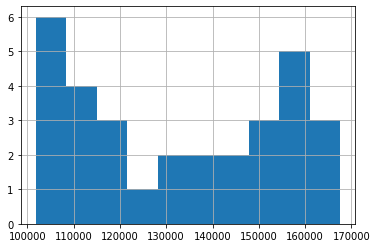

In [169]:
df_Continent['World'].hist()
plt.show()

In [170]:
count, bins = np.histogram(df_Continent['World'].values, bins=7)
segmentos = np.round(bins/1000,2)
segmentos

array([101.86, 111.24, 120.63, 130.01, 139.4 , 148.78, 158.17, 167.55])

In [171]:
df_continent_normal = df_Continent['World']/1000
df_continent_normal

0     101.85554
1     102.48356
2     102.58823
3     103.64656
4     104.44903
5     107.11230
6     109.76394
7     110.90368
8     111.45029
9     113.97400
10    116.59075
11    117.52115
12    120.20768
13    124.46426
14    129.95362
15    133.58218
16    137.39682
17    141.21146
18    142.87455
19    141.49058
20    149.29431
21    151.78313
22    153.74860
23    155.95830
24    157.66791
25    158.08659
26    159.37752
27    162.45947
28    166.29737
29    167.55341
30    160.81964
Name: World, dtype: float64

In [172]:
rangos_consumo = [100,110,120,130,140,150,160,170]
consumo_segmentos = pd.cut(np.round(df_continent_normal,2), bins=rangos_consumo)
consumo_segmentos_count = consumo_segmentos.value_counts()
consumo_segmentos_count

(100, 110]    7
(150, 160]    6
(110, 120]    5
(140, 150]    4
(160, 170]    4
(120, 130]    3
(130, 140]    2
Name: World, dtype: int64

<AxesSubplot:>

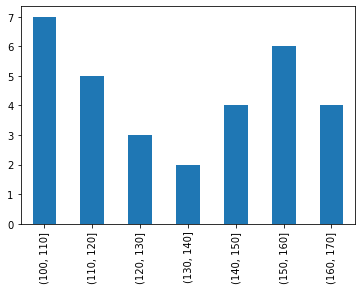

In [173]:
consumo_segmentos_count.sort_index().plot(kind='bar')

In [174]:
# Notamos que los datos de Year se encuentran como los índices del dataset
# Restablecemos el índica y hacemos que el índice anterior que correspondía a los años se agregue como columna
df_Continent_years = df_Continent.reset_index()

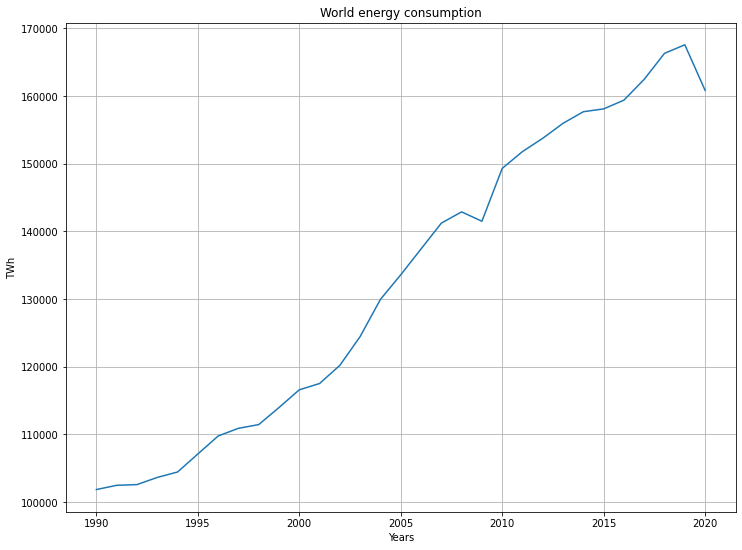

In [175]:
world_energy_consumption = df_Continent['World'].values
years = df_Continent_years['Year'].values

plt.figure(figsize=(12,9))
plt.plot(years,world_energy_consumption)
plt.xlabel('Years')
plt.ylabel('TWh')
plt.title('World energy consumption')
plt.grid(True)
plt.show()



Podemos ver claramente que el consumo energético en el mundo aumenta cada año. Pero notamos dos cambios abruptos cerca del 2008-2009 y 2020. Podríamos asociar estos cambios a:
- 2008-2009: Gran recesión o crisis económica iniciada en el 2008, pero que se evidenció en el 2009.
- 2019-2020: En Noviembre del 2019 se encontró el primer caso de Covid19 y en el 2020 se delcaró pandemia mundial.

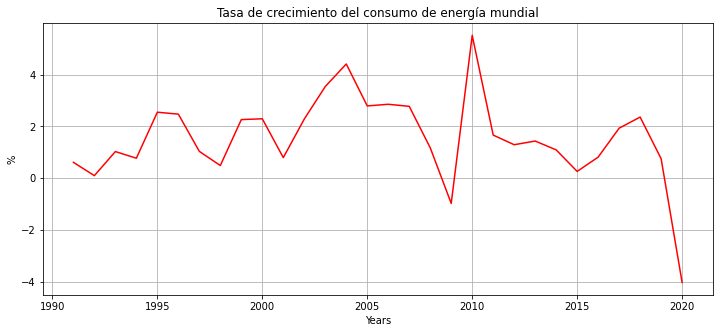

In [176]:
tasa_crecimiento = df_Continent['World'].pct_change().mul(100) 

plt.figure(figsize=(12,5))
plt.plot(years,tasa_crecimiento, 'r')
plt.xlabel('Years')
plt.ylabel('%')
plt.title('Tasa de crecimiento del consumo de energía mundial')
plt.grid(True)
plt.show()

In [177]:
profile = ppr.ProfileReport(df_Continent, title='Pandas Profiling Report', minimal=True)

In [178]:
profile.to_file('../data/reports/Continent_Consumption_TWH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]


# Preguntas de investigacion
Identificamos 3 ejes de análisis:
- Consumo energético
- Fuentes de generación de energía
- Crecimiento de demanda energética.

### Consumo energético
1. ¿Qué organizaciones consumen más energía?
1. ¿Qué países consumen más energía?
### Crecimiento de demanda energética
1. ¿Qué países han tenido mayor crecimiento en la demanda energética y cuáles han tenido disminuciones de demanda?
### Fuentes de generación de energía
1. ¿Cuáles son las principales fuentes de generacion de energía de los países, continentes, organizaciónes?
1. ¿Qué fuentes de energía renovable son las de mayor crecimiento?
1. ¿Qué países y organizaciones tienen fuentes de generación más limpias (Renvables o no Renovables)?

Ejes de exploración: Consumo, Fuentes, crecimiento

## Consumo energético

In [179]:
continentes = ['Year','Asia','Africa','Europe','North America','Latin America']
organization_name = ['Year','OECD','CIS','Middle-East','BRICS']

In [180]:
# Consumo energético por Organizaciones
df_org_cons = df_Continent_years[organization_name]
df_org_cons.head()

,Year,OECD,CIS,Middle-East,BRICS
0,1990,52602.49,16049.40,2581.86,26621.07
1,1991,53207.25,15898.21,2744.68,26434.99
2,1992,53788.75,14339.79,3081.95,25993.05
3,1993,54614.48,13246.57,3349.44,26283.80
4,1994,55579.77,11606.74,3640.19,25993.05


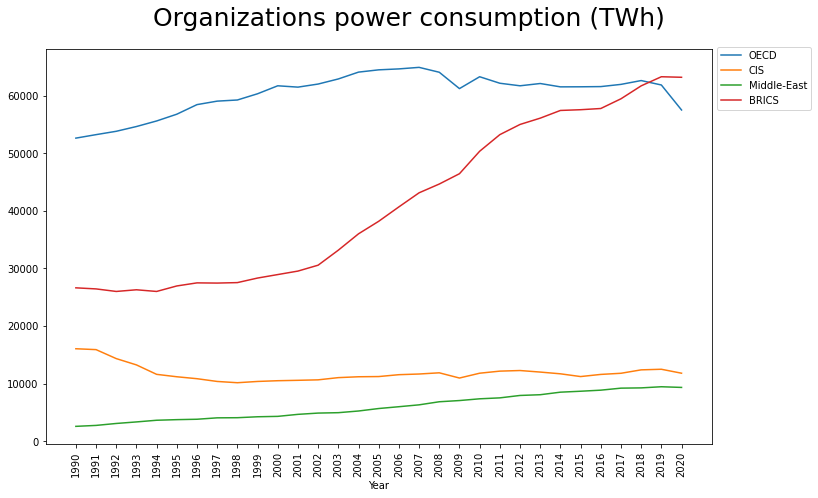

In [200]:
ax = df_org_cons.plot(x='Year',y=df_org_cons.columns[1:], figsize=(12,7))
fig = ax.get_figure()
ax.set_xticks(df_org_cons['Year'])
ax.tick_params(axis='x', rotation=90)
ax.legend(bbox_to_anchor=(1,1.02), loc='upper left')
fig.tight_layout(pad=3)
fig.suptitle('Organizations power consumption (TWh)', fontsize=25, y=1.02)

plt.show()

In [182]:
# Consumo energético por Continentes
df_cont_cons = df_Continent_years[continentes]
df_cont_cons.head()

,Year,Asia,Africa,Europe,North America,Latin America
0,1990,24574.19,4407.77,20654.88,24667.23,5373.06
1,1991,24783.53,4535.70,20631.62,24841.68,5500.99
2,1992,25690.67,4582.22,20189.68,25341.77,5628.92
3,1993,26876.93,4721.78,20189.68,25830.23,5675.44
4,1994,28098.08,4803.19,20085.01,26365.21,5989.45


Text(0.5, 1.02, 'Continents power consumption (TWh)')

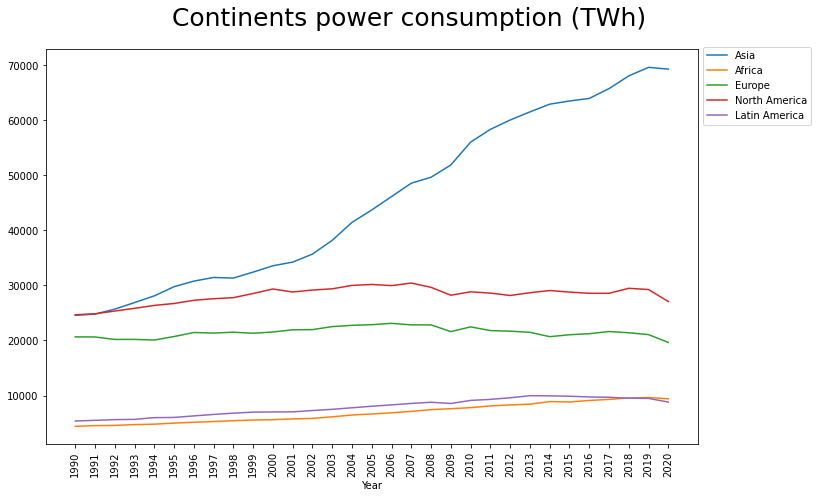

In [229]:
ax1 = df_cont_cons.plot(x='Year',y=df_cont_cons.columns[1:], figsize=(12,7))
fig1 = ax1.get_figure()
ax1.set_xticks(df_org_cons['Year'])
ax1.tick_params(axis='x', rotation=90)
ax1.legend(bbox_to_anchor=(1,1.02), loc='upper left')
fig1.tight_layout(pad=3)
fig1.suptitle('Continents power consumption (TWh)', fontsize=25, y=1.02)


In [184]:
profile_countries = ppr.ProfileReport(df_Countries, title='Pandas Profiling Report', minimal=True)
profile_countries.to_file('../data/reports/Continent_Countries_TWH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 200.23it/s]


In [185]:
df_Country.tail()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
28,2018.0,3201.0,2236.0,288.0,53.0,43.0,246.0,302.0,151.0,73.0,...,128.0,20.0,61.0,96.0,160.0,134.0,266.0,34.0,214.0,78.0
29,2019.0,3309.0,2214.0,293.0,55.0,43.0,243.0,294.0,149.0,72.0,...,129.0,21.0,65.0,97.0,157.0,129.0,269.0,36.0,215.0,83.0
30,2020.0,3381.0,2046.0,286.0,51.0,39.0,217.0,275.0,137.0,70.0,...,126.0,21.0,59.0,92.0,159.0,124.0,268.0,38.0,209.0,81.0
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df_Countries_na = df_Countries['China'].isna().sum()
print(df_Countries_na)
print(round(df_Countries_na/df_Countries.shape[0]*100,2),'%')

2
6.06 %


In [187]:
df_Countries.isnull().sum()

Year                    2
China                   2
United States           2
Brazil                  2
Belgium                 2
Czechia                 2
France                  2
Germany                 2
Italy                   2
Netherlands             2
Poland                  2
Portugal                2
Romania                 2
Spain                   2
Sweden                  2
United Kingdom          2
Norway                  2
Turkey                  2
Kazakhstan              2
Russia                  2
Ukraine                 2
Uzbekistan              2
Argentina               2
Canada                  2
Chile                   2
Colombia                2
Mexico                  2
Venezuela               2
Indonesia               2
Japan                   2
Malaysia                2
South Korea             2
Taiwan                  2
Thailand                2
India                   2
Australia               2
New Zealand             2
Algeria                 2
Egypt       

In [188]:
nan_rows = df_Countries[df_Countries.isnull().any(1)]
nan_rows

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# Hemos localizado las filas con los valores NaN, se trata de las dos ultimas filas de cada variable
df_Countries_sin_nan = df_Countries.dropna(how='any')
df_Countries_sin_nan.tail()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
26,2016.0,2977.0,2168.0,287.0,56.0,41.0,248.0,310.0,151.0,74.0,...,127.0,21.0,56.0,88.0,150.0,135.0,246.0,36.0,215.0,79.0
27,2017.0,3070.0,2161.0,292.0,55.0,43.0,247.0,311.0,154.0,74.0,...,128.0,21.0,57.0,93.0,152.0,136.0,262.0,34.0,219.0,78.0
28,2018.0,3201.0,2236.0,288.0,53.0,43.0,246.0,302.0,151.0,73.0,...,128.0,20.0,61.0,96.0,160.0,134.0,266.0,34.0,214.0,78.0
29,2019.0,3309.0,2214.0,293.0,55.0,43.0,243.0,294.0,149.0,72.0,...,129.0,21.0,65.0,97.0,157.0,129.0,269.0,36.0,215.0,83.0
30,2020.0,3381.0,2046.0,286.0,51.0,39.0,217.0,275.0,137.0,70.0,...,126.0,21.0,59.0,92.0,159.0,124.0,268.0,38.0,209.0,81.0


In [190]:
only_countries = list(set(df_Countries_sin_nan.columns) - set(['Year']))


df_Countries_mean = df_Countries_sin_nan[only_countries].mean()
df_Countries_mean

Mexico                   163.516129
Germany                  327.903226
Ukraine                  139.064516
Belgium                   54.903226
Kuwait                    23.161290
Argentina                 66.064516
Nigeria                  108.967742
China                   1923.322581
Norway                    27.064516
Russia                   691.677419
Iran                     169.064516
Uzbekistan                46.774194
Czechia                   43.258065
South Africa             118.193548
Chile                     28.032258
United Kingdom           204.322581
Venezuela                 56.290323
Taiwan                    89.032258
Malaysia                  61.225806
Portugal                  22.225806
Spain                    117.838710
Indonesia                171.741935
United Arab Emirates      49.064516
Brazil                   223.451613
Canada                   259.516129
Poland                    97.419355
Japan                    476.741935
Turkey                    92

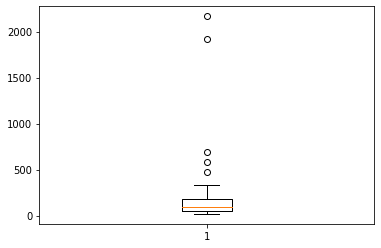

In [191]:
plt.boxplot(df_Countries_mean)
plt.show()

In [192]:
df_med = df_Countries_mean.mean()
print(df_med)

225.9692082111437


In [193]:
df_top_ten = df_Countries_sin_nan.loc[:,df_Countries_sin_nan.mean(axis=0) > 210]
df_top_ten.head(5)

,Year,China,United States,Brazil,France,Germany,Russia,Canada,Japan,South Korea,India
0,1990.0,874.0,1910.0,141.0,225.0,351.0,879.0,211.0,440.0,94.0,306.0
1,1991.0,848.0,1925.0,143.0,237.0,344.0,871.0,210.0,445.0,101.0,318.0
2,1992.0,877.0,1964.0,145.0,234.0,338.0,795.0,216.0,455.0,111.0,330.0
3,1993.0,929.0,1998.0,148.0,238.0,335.0,751.0,223.0,458.0,125.0,338.0
4,1994.0,973.0,2036.0,156.0,231.0,333.0,657.0,231.0,483.0,133.0,351.0


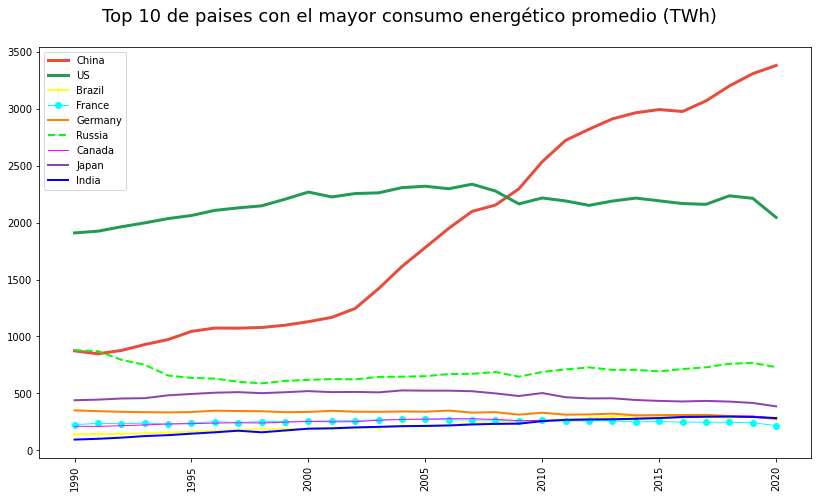

In [246]:
## Aquí hago la gráfica de los 10 países que mas consumen
fig , ax = plt.subplots(figsize=(12,7))

x1 = df_top_ten.iloc[:,0]

y1 = df_top_ten.iloc[:,1]
y2 = df_top_ten.iloc[:,2]
y3 = df_top_ten.iloc[:,3]
y4 = df_top_ten.iloc[:,4]
y5 = df_top_ten.iloc[:,5]
y6 = df_top_ten.iloc[:,6]
y7 = df_top_ten.iloc[:,7]
y8 = df_top_ten.iloc[:,8]
y9 = df_top_ten.iloc[:,9]

ax.tick_params(axis='x', rotation=90)

plt.plot(x1, y1, marker ='', linewidth=3, label='China', color='#E74C3C')
plt.plot(x1, y2, marker ='', linewidth=3, label = 'US', color='#239B56')
plt.plot(x1, y3, marker ='+', linewidth=2, label = 'Brazil', color='#FFFF25')
plt.plot(x1, y4, marker ='o', linewidth=1, label='France', color='#00FFFF')
plt.plot(x1, y5, marker ='', linewidth=2, label='Germany', color='#FF8000')
plt.plot(x1, y6, marker ='', linewidth=2, linestyle='dashed', label='Russia', color='#00FF00')
plt.plot(x1, y7, marker ='', linewidth=1, label='Canada', color='#FF00FF')
plt.plot(x1, y8, marker ='', linewidth=2, label='Japan', color='#8E44AD')
plt.plot(x1, y9, marker ='', linewidth=2, label='India', color='#0000FF')

plt.legend(fontsize=10)
fig.tight_layout(pad=3) # tight_layout nos ayuda a ajustar el relleno del plot y el parametro pad sirve para ajustar el relleno entre el borde de la figura y los bordes de las subtramas (como fraccion)
fig.suptitle('Top 10 de paises con el mayor consumo energético promedio (TWh)', fontsize=18, y=1.02)

plt.show()